Train Models to Predict EngagementLevel

In [2]:
import pandas as pd
import os
import numpy as np
import joblib
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# -----------------------------------------------------
# Load transformed dataset
# -----------------------------------------------------
df = pd.read_csv("../data/processed/gaming_data_processed.csv")



In [6]:
df.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,purchases_per_session,playtime_per_week,achievement_rate
0,9000,1.096023,1,2,4,0.614176,-0.501334,2,-0.602363,0.269487,1.026459,0.032814,1,0.000000,97.626713,0.316456
1,9001,-0.297969,0,3,4,-0.939816,-0.501334,2,-0.775865,1.004019,-1.352160,-1.006648,1,0.000000,27.629807,0.909091
2,9002,-0.994965,0,3,3,-0.549654,-0.501334,0,1.132666,0.963212,-0.512647,1.141573,2,0.000000,131.580084,1.171429
3,9003,0.299456,1,3,0,-0.977506,1.994676,0,-0.081854,-0.199798,0.256906,1.557358,1,0.111111,47.388161,0.824561
4,9004,0.100314,1,1,0,0.507275,-0.501334,2,-1.296374,0.738771,1.586134,0.864383,1,0.000000,31.063889,0.389474


In [7]:
df.describe()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel,purchases_per_session,playtime_per_week,achievement_rate
count,40034.000000,4.003400e+04,40034.000000,40034.000000,40034.000000,4.003400e+04,4.003400e+04,40034.00000,4.003400e+04,4.003400e+04,4.003400e+04,4.003400e+04,40034.000000,40034.000000,40034.000000,40034.000000
mean,29016.500000,-7.844829e-17,0.598466,1.695409,2.001049,2.857506e-17,-2.023327e-17,0.80007,1.490873e-16,-1.409229e-16,-3.194727e-17,8.439403e-17,1.000300,0.045342,113.746400,1.279607
std,11556.964675,1.000012e+00,0.490215,1.189780,1.415431,1.000012e+00,1.000012e+00,0.87179,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,0.718383,0.154041,103.310324,3.372445
min,9000.000000,-1.691961e+00,0.000000,0.000000,0.000000,-1.738978e+00,-5.013344e-01,0.00000,-1.643379e+00,-1.730074e+00,-1.701956e+00,-1.699622e+00,0.000000,0.000000,0.000000,0.000000
25%,19008.250000,-8.953939e-01,0.000000,1.000000,1.000000,-8.614969e-01,-5.013344e-01,0.00000,-9.493682e-01,-8.731195e-01,-8.624440e-01,-8.680529e-01,0.000000,0.000000,28.383614,0.240741
50%,29016.500000,7.436599e-04,1.000000,1.000000,2.000000,-2.366490e-03,-5.013344e-01,1.00000,-8.185412e-02,4.238833e-03,-2.293155e-02,3.281390e-02,1.000000,0.000000,84.059480,0.500000
75%,39024.750000,8.968812e-01,1.000000,3.000000,3.000000,8.589806e-01,-5.013344e-01,2.00000,7.856600e-01,8.611935e-01,8.515606e-01,8.643833e-01,2.000000,0.000000,174.452112,0.978723
max,49033.000000,1.693448e+00,1.000000,3.000000,4.000000,1.731888e+00,1.994676e+00,2.00000,1.653174e+00,1.718148e+00,1.726053e+00,1.695953e+00,2.000000,1.000000,455.893133,49.000000


In [8]:
df.dtypes

PlayerID                       int64
Age                          float64
Gender                         int64
Location                       int64
GameGenre                      int64
PlayTimeHours                float64
InGamePurchases              float64
GameDifficulty                 int64
SessionsPerWeek              float64
AvgSessionDurationMinutes    float64
PlayerLevel                  float64
AchievementsUnlocked         float64
EngagementLevel                int64
purchases_per_session        float64
playtime_per_week            float64
achievement_rate             float64
dtype: object

In [9]:
# Shape of dataset
print("Shape:", df.shape)
# Preview
print(df.head())
# Basic info
print(df.info())

Shape: (40034, 16)
   PlayerID       Age  Gender  Location  GameGenre  PlayTimeHours  \
0      9000  1.096023       1         2          4       0.614176   
1      9001 -0.297969       0         3          4      -0.939816   
2      9002 -0.994965       0         3          3      -0.549654   
3      9003  0.299456       1         3          0      -0.977506   
4      9004  0.100314       1         1          0       0.507275   

   InGamePurchases  GameDifficulty  SessionsPerWeek  \
0        -0.501334               2        -0.602363   
1        -0.501334               2        -0.775865   
2        -0.501334               0         1.132666   
3         1.994676               0        -0.081854   
4        -0.501334               2        -1.296374   

   AvgSessionDurationMinutes  PlayerLevel  AchievementsUnlocked  \
0                   0.269487     1.026459              0.032814   
1                   1.004019    -1.352160             -1.006648   
2                   0.963212    -0

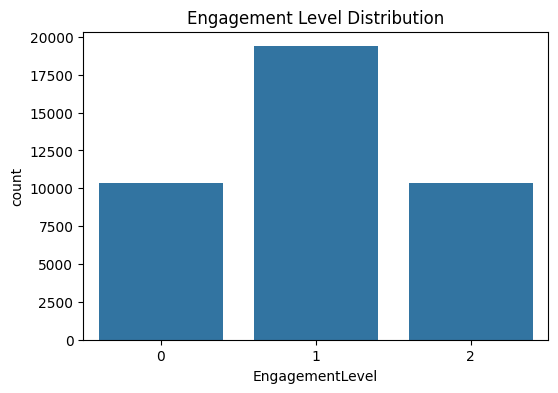

In [10]:
# 1. Distribution of EngagementLevel
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="EngagementLevel")
plt.title("Engagement Level Distribution")
plt.show()

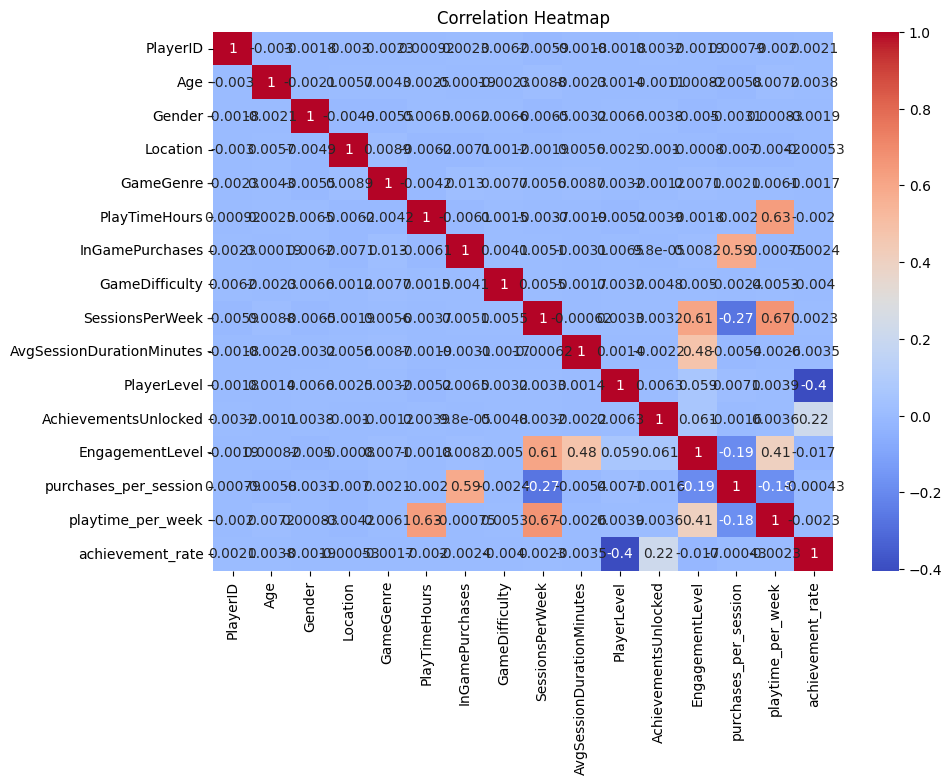

In [11]:
# 2. Correlation Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

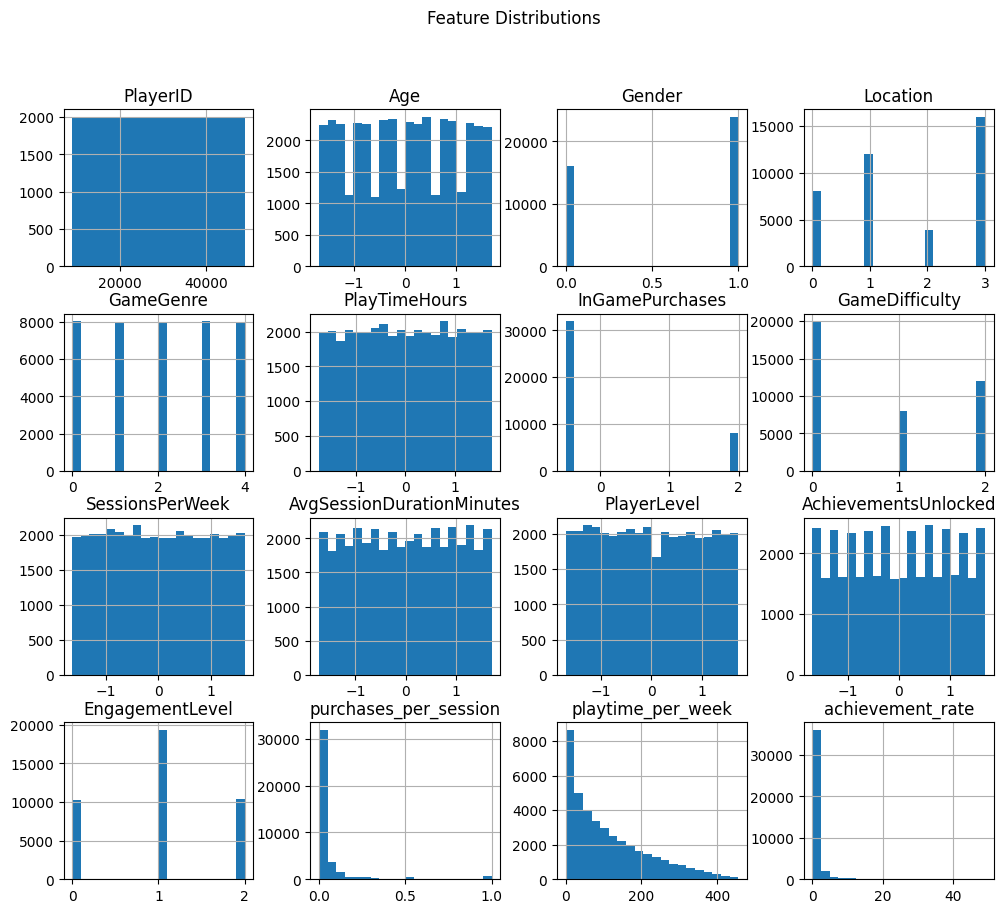

In [12]:
# 3. Numeric features distribution
df.hist(figsize=(12,10), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

In [13]:
# X = features, y = EngagementLevel
X = df.drop(columns=["PlayerID","EngagementLevel"])
y = df["EngagementLevel"]

In [14]:
X.shape, y.shape

((40034, 14), (40034,))

In [15]:
# Train Random Forest to get feature importance
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X, y)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
# Extract feature importance
importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Select top N features (e.g., top 15)
top_features = importance.head(15)["Feature"].tolist()


In [17]:
# Subset dataset with selected features
X_selected = X[top_features]


In [18]:

print("Selected Features for all models:")
print(top_features)

Selected Features for all models:
['AvgSessionDurationMinutes', 'SessionsPerWeek', 'playtime_per_week', 'PlayTimeHours', 'achievement_rate', 'PlayerLevel', 'AchievementsUnlocked', 'Age', 'purchases_per_session', 'GameGenre', 'Location', 'GameDifficulty', 'Gender', 'InGamePurchases']


In [19]:
X_selected.shape, y.shape

((40034, 14), (40034,))

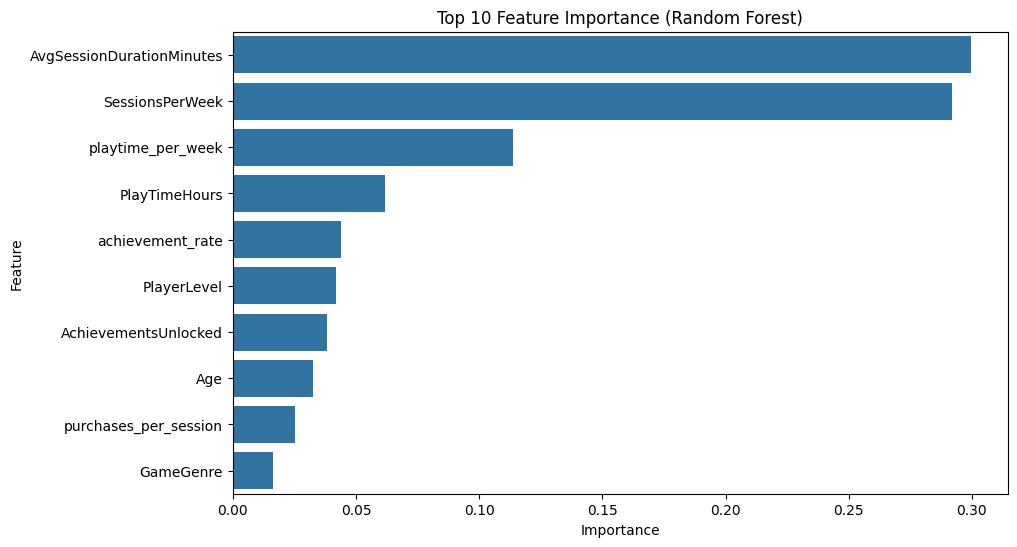

In [20]:
#  Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=importance.head(10))
plt.title("Top 10 Feature Importance (Random Forest)")
plt.show()

In [21]:
# -----------------------------
#  Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.25, random_state=42, stratify=y
)

In [22]:
# -----------------------------
# Model Training, Evaluation & Saving
# -----------------------------
def evaluate_model(model, name, save_dir="models"):
    # Create directory if it doesn't exist
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    preds = model.predict(X_test)
    
    # Metrics
    acc = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds)
    cm = confusion_matrix(y_test, preds)
    
    # Print metrics
    print(f"\nModel: {name}")
    print("Accuracy:", acc)
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", cm)
    
    # Save evaluation report to txt
    report_path = os.path.join(save_dir, f"{name}_evaluation.txt")
    with open(report_path, "w") as f:
        f.write(f"Model: {name}\n")
        f.write(f"Accuracy: {acc:.4f}\n\n")
        f.write("Classification Report:\n")
        f.write(report + "\n")
        f.write("Confusion Matrix:\n")
        f.write(str(cm) + "\n")
    print(f"Evaluation report saved at: {report_path}")
    
    # Save the trained model
    model_path = os.path.join(save_dir, f"{name}_model.pkl")
    joblib.dump(model, model_path)
    print(f"Trained model saved at: {model_path}")
    
    # Confusion Matrix plot
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_,
                yticklabels=model.classes_)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    return acc


/opt/anaconda3/envs/project-01/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Model: Logistic Regression
Accuracy: 0.8295534019382556
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76      2581
           1       0.80      0.89      0.85      4844
           2       0.90      0.82      0.86      2584

    accuracy                           0.83     10009
   macro avg       0.84      0.81      0.82     10009
weighted avg       0.83      0.83      0.83     10009

Confusion Matrix:
 [[1844  667   70]
 [ 354 4334  156]
 [  74  385 2125]]
Evaluation report saved at: models/Logistic Regression_evaluation.txt
Trained model saved at: models/Logistic Regression_model.pkl


/opt/anaconda3/envs/project-01/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


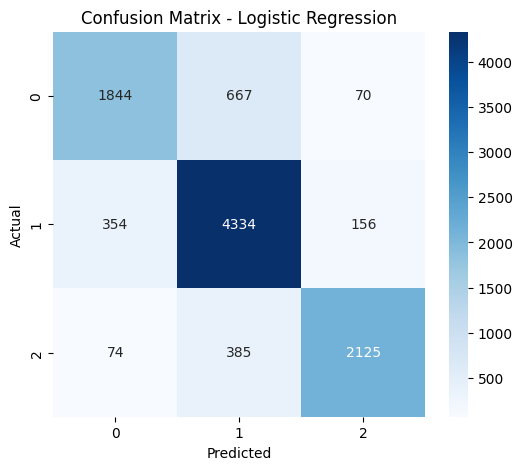

In [23]:
# Logistic Regression
lr = LogisticRegression(max_iter=2000, multi_class="multinomial", solver="lbfgs")
acc_lr = evaluate_model(lr, "Logistic Regression")



Model: Decision Tree
Accuracy: 0.8528324507942852
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.77      0.82      2581
           1       0.83      0.92      0.87      4844
           2       0.90      0.81      0.85      2584

    accuracy                           0.85     10009
   macro avg       0.86      0.83      0.85     10009
weighted avg       0.86      0.85      0.85     10009

Confusion Matrix:
 [[1998  517   66]
 [ 229 4454  161]
 [  76  424 2084]]
Evaluation report saved at: models/Decision Tree_evaluation.txt
Trained model saved at: models/Decision Tree_model.pkl


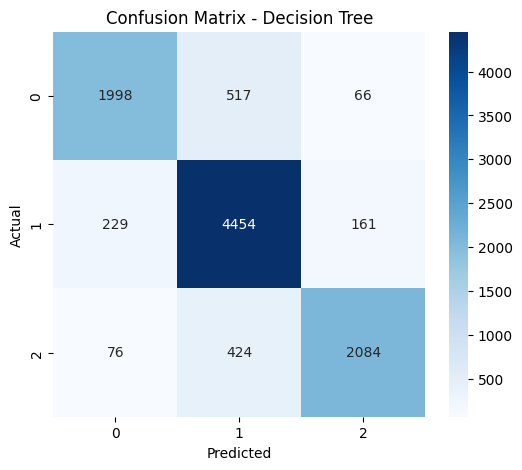

In [24]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
acc_dt = evaluate_model(dt, "Decision Tree")


Model: Random Forest
Accuracy: 0.8403436906783894
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      2581
           1       0.80      0.94      0.86      4844
           2       0.89      0.79      0.84      2584

    accuracy                           0.84     10009
   macro avg       0.86      0.81      0.83     10009
weighted avg       0.85      0.84      0.84     10009

Confusion Matrix:
 [[1831  685   65]
 [ 123 4532  189]
 [  61  475 2048]]
Evaluation report saved at: models/Random Forest_evaluation.txt
Trained model saved at: models/Random Forest_model.pkl


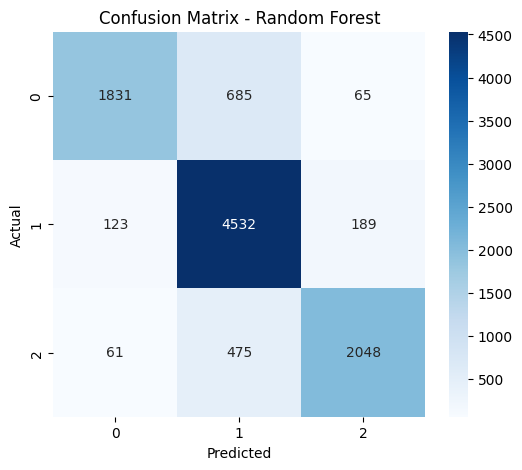

In [25]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=300, max_depth=7, random_state=42)
acc_rf = evaluate_model(rf_model, "Random Forest")


Model: XGBoost
Accuracy: 0.9173743630732341
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      2581
           1       0.91      0.95      0.93      4844
           2       0.93      0.88      0.90      2584

    accuracy                           0.92     10009
   macro avg       0.92      0.91      0.91     10009
weighted avg       0.92      0.92      0.92     10009

Confusion Matrix:
 [[2288  220   73]
 [ 125 4611  108]
 [  75  226 2283]]
Evaluation report saved at: models/XGBoost_evaluation.txt
Trained model saved at: models/XGBoost_model.pkl


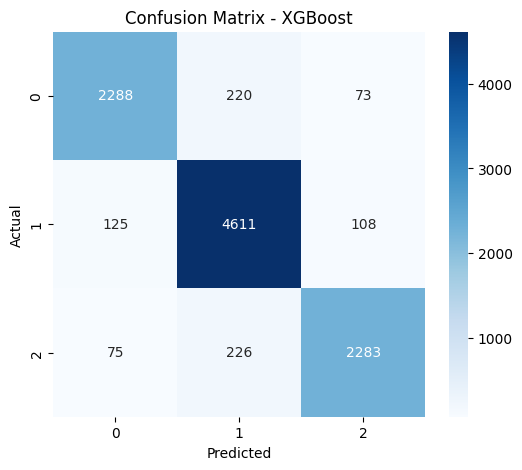

In [26]:
# XGBoost
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    objective="multi:softmax",
    num_class=len(y.unique()),
    eval_metric="mlogloss",
    random_state=42
)
acc_xgb = evaluate_model(xgb, "XGBoost")

In [27]:
# -----------------------------
# Accuracy Comparison
# -----------------------------
print("\n======== MODEL ACCURACY COMPARISON ========")
print(f"Logistic Regression: {acc_lr}")
print(f"Decision Tree:       {acc_dt}")
print(f"Random Forest:       {acc_rf}")
print(f"XGBoost:             {acc_xgb}")


======== MODEL ACCURACY COMPARISON ========
Logistic Regression: 0.8295534019382556
Decision Tree:       0.8528324507942852
Random Forest:       0.8403436906783894
XGBoost:             0.9173743630732341


/var/folders/nw/tdhhbz510tv40212t1hqfwn00000gn/T/ipykernel_94037/3691341853.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=accuracy_df, palette="viridis")


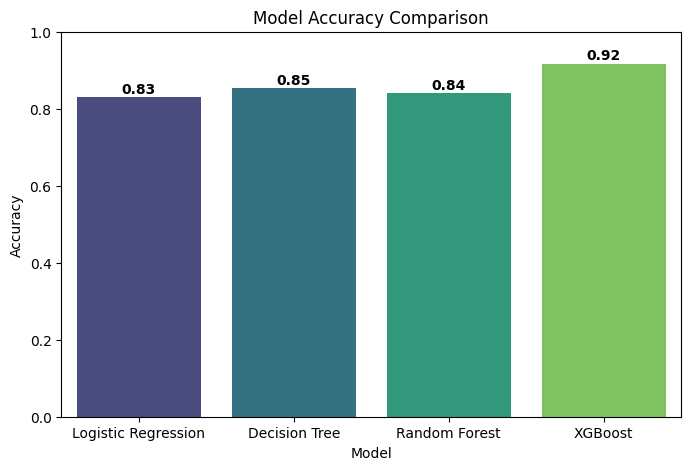

In [28]:
# Create a dataframe for plotting
accuracy_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": [acc_lr, acc_dt, acc_rf, acc_xgb]
})

plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Accuracy", data=accuracy_df, palette="viridis")
plt.ylim(0,1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")
for i, v in enumerate(accuracy_df["Accuracy"]):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()